<a href="https://colab.research.google.com/github/pxpper/Section_Project/blob/main/AI_03_%EC%95%88%EC%A0%95%EC%9D%B4_section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## * DATA SCIENCE / SECTION 1 / PROJECT / AI_03_안정이

# 🏆 3분기 게임 설계 기획
##### ✔ 지역에 따라서 선호하는 게임 장르가 다를까
##### ✔ 연도별 게임의 트렌드가 있을까
##### ✔ 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [240]:
# 사용 라이브러리 입력

import pandas as pd
import numpy as np

In [243]:
# Colab & 드라이브 연결

from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [244]:
# csv 파일 DataFrame 불러오기

g_data = ('/gdrive/MyDrive/AI_03_안정이/vgames2.csv')

df = pd.read_csv(g_data)
df = df.drop(columns='Unnamed: 0')
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [245]:
# 데이터 정보 확인

df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [246]:
# 결측치 확인
df.isna().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [247]:
# 결측치 제거

df=df.dropna(axis=0)

In [248]:
# Columns Series 항목 및 갯수 확인 완료
#df.Genre.value_counts(ascending=True).head(30)

In [249]:
# 각 Sales 의 M, K 단위 통일 (M 기준)

def replace_M_and_K(x) :
    if str(x)[-1] == "M":
        return float(str(x)[:-1]) * 1000000
    elif str(x)[-1] == 'K':
        return float(str(x)[:-1]) * 1000
    else:
        return float(x)

In [267]:
df['NA_Sales']=df['NA_Sales'].apply(replace_M_and_K)
df['EU_Sales']=df['EU_Sales'].apply(replace_M_and_K)
df['JP_Sales']=df['JP_Sales'].apply(replace_M_and_K)
df['Other_Sales']=df['Other_Sales'].apply(replace_M_and_K)

In [269]:
df1['Sales_Sum']=(df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales'])

In [271]:
df2 = df1.sort_values(['Sales_Sum'], ascending=False)
df2.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Sum
10913,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9630000.00,5.31,0.06,1.38,9630006.75
12600,Halo: Reach,X360,2010.0,Shooter,Microsoft Game Studios,7030000.00,1.98,0.08,0.78,7030002.84
577,Mario Kart 64,N64,1996.0,Racing,Nintendo,5550000.00,1.94,2.23,0.15,5550004.32
1964,The Legend of Zelda: Ocarina of Time,N64,1998.0,Action,Nintendo,4100000.00,1.89,1.45,0.16,4100003.50
1810,Pokemon FireRed/Pokemon LeafGreen,GBA,2004.0,Role-Playing,Nintendo,4.34,2.65,3150000.00,0.35,3150007.34


In [274]:
df3 = df2.dropna()

In [418]:
# 정수화해서 소수점 삭제
df3['Year'] = df3['Year'].astype(int)

In [338]:
# Year 2자리 값) 20보다 적은 값: 2000년대, 20보다 큰 값: 1900년대
# df['Year'] = df['Year'].astype(int)

def set (x): 
    if x < 30 :
        return x + 2000
    elif x >= 30 and x < 100 :
        return x + 1900
    else:
        return x

df4= df3['Year'].apply(lambda x : set(x))
df4.mean() 

2006.4067483529338

In [339]:
a = df3.drop(['Year'], axis = 1)

In [340]:
df5 = pd.concat([df4, a], axis = 1)
df5.head()

,Year,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Sales_Sum
10913,2013,Grand Theft Auto V,X360,Action,Take-Two Interactive,9630000.00,5.31,0.06,1.38,9630006.75
12600,2010,Halo: Reach,X360,Shooter,Microsoft Game Studios,7030000.00,1.98,0.08,0.78,7030002.84
577,1996,Mario Kart 64,N64,Racing,Nintendo,5550000.00,1.94,2.23,0.15,5550004.32
1964,1998,The Legend of Zelda: Ocarina of Time,N64,Action,Nintendo,4100000.00,1.89,1.45,0.16,4100003.50
1810,2004,Pokemon FireRed/Pokemon LeafGreen,GBA,Role-Playing,Nintendo,4.34,2.65,3150000.00,0.35,3150007.34


## ❓ 지역에 따라서 선호하는 게임 장르가 다를까

In [420]:
# 장르값 확인

df['Genre'].sort_values(ascending=True).unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

In [366]:
# 지역별로 판매된 장르 합

NA_G=df5.groupby('Genre')['NA_Sales'].sum()
dfg1=pd.DataFrame(NA_G)
EU_G=df5.groupby('Genre')['EU_Sales'].sum()
dfg2=pd.DataFrame(EU_G)
JP_G=df5.groupby('Genre')['JP_Sales'].sum()
dfg3=pd.DataFrame(JP_G)
Other_G=df5.groupby('Genre')['Other_Sales'].sum()
dfg4=pd.DataFrame(Other_G)

dfg=pd.concat([dfg1,dfg2,dfg3,dfg4],axis=1,sort=False)
dfg

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,21470837.28,7030506.61,1440155.16,1340182.65
Adventure,760101.03,190063.47,80051.79,280016.42
Fighting,1360218.99,1420098.48,1340085.80,500035.65
Misc,4090390.64,2820205.33,420103.76,460072.18
Platform,5220440.16,7620193.01,790129.74,480050.97
Puzzle,80121.50,410050.06,56.24,50012.39
Racing,11950342.75,2040232.98,280056.04,420076.09
Role-Playing,1600317.16,1610181.48,11780331.15,1620055.11
Shooter,12430562.05,6120304.11,60038.12,740101.12


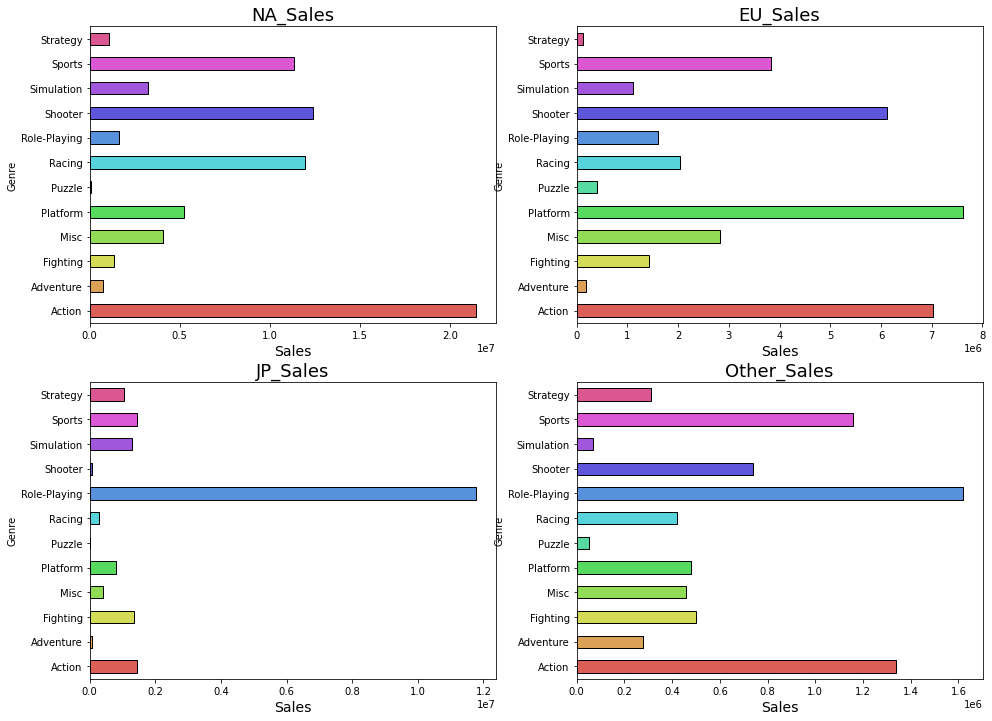

In [419]:
import seaborn as sns

grp = ['NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales']
plt.rcParams['figure.figsize'] = [16, 12]

plt.title('Sales_Sum: %s' %grp, fontsize=18)
colors = sns.color_palette('hls',len(Genre_G.index))

for i, grp in enumerate(grp):
    plt.subplot(2, 2, i+1)
    Genre_G[grp].plot(kind = 'barh', color=colors,edgecolor='black', alpha = 1);
    plt.title('%s' %grp, fontsize=18)
    plt.xlabel('Sales', fontsize=14)

NA > Action 장르가 우월한 판매량을 보임.
EU > Platform 과 Action 부문 앞다툼
JP > Role-Playing 앞도적으로 우세

북미, 유럽 지역은 문화권이 비슷해서인지 선호하는 장르가 비슷하다.

## ❓ 연도별 게임의 트렌드가 있을까

In [350]:
import matplotlib.pyplot as plt

df['Sales_Sum']=(df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales'])

df7=pd.concat([df['Genre'], df5['Year'], df['Sales_Sum']], axis=1)
df7

,Genre,Year,Sales_Sum
0,Action,2008,0.04
1,Action,2009,0.18
2,Adventure,2010,0.02
3,Misc,2010,0.04
4,Platform,2010,0.25
...,...,...,...
16593,Platform,2006,0.20
16594,Action,2005,0.01
16595,Sports,2015,0.79
16596,Action,2013,0.38


In [351]:
# 연도별 장르에 따른 판매량 비교
# 결측값 0으로 대체해주기

total = df7.groupby(['Year', 'Genre']).Sales_Sum.sum()
total_Sales_Sum = df7.pivot_table('Sales_Sum', index='Year', columns='Genre', aggfunc=sum)
total_Sales_Sum.fillna(0)

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980,0.34,0.00,0.77,2.70,0.00,0.00,0.00,0.00,7.07,0.00,0.00,0.00
1981,110014.68,0.00,0.00,0.00,6.92,2.25,0.48,0.00,10.02,0.44,0.78,0.00
1982,6.50,0.00,0.00,0.87,5.03,10.04,1.57,0.00,3.81,0.00,1.06,0.00
1983,2.86,0.40,0.00,2.14,6.93,0.78,0.00,0.00,0.49,0.00,3.20,0.00
1984,1.85,0.00,0.00,1.45,0.69,3.14,5.95,0.00,31.10,0.00,6.17,0.00
1985,3.52,0.00,1.05,0.00,460042.71,3.21,0.00,0.00,1.00,0.04,1.96,0.00
1986,13.74,0.00,0.00,0.00,9.39,0.00,1.96,2.52,3.89,0.00,5.58,0.00
1987,1.11,4.38,5.42,0.00,1.74,0.00,0.00,4.65,0.69,0.00,3.71,0.00
1988,1.74,0.00,0.00,0.00,190027.54,5.58,2.14,5.88,0.51,0.03,3.60,0.00


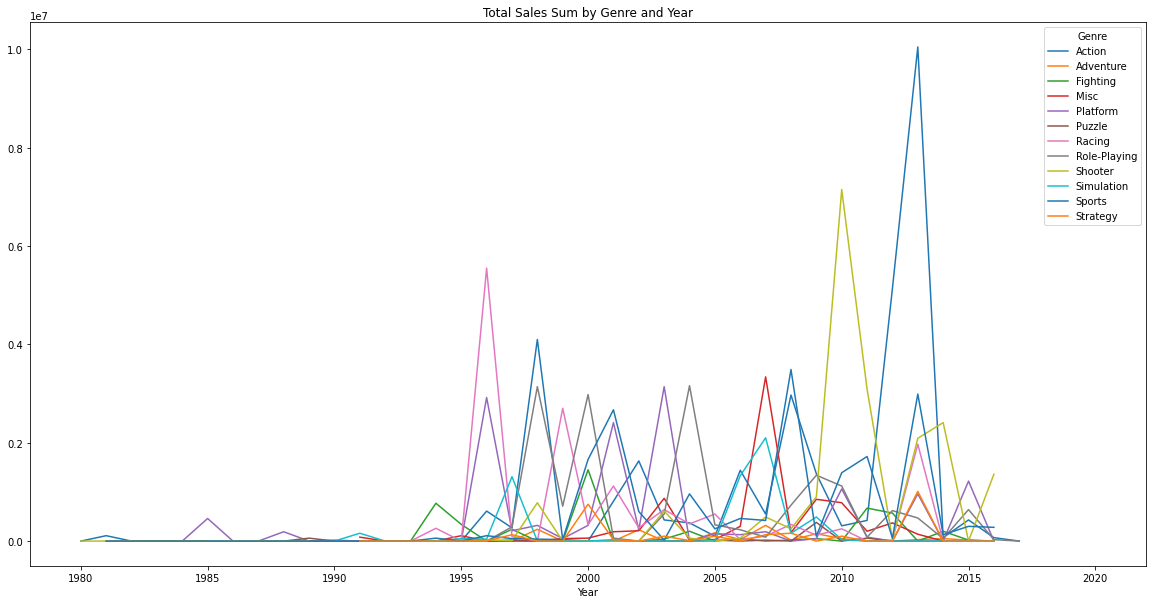

In [352]:
# 시각화
# [width, height] (inches)
# plot = total_Sales_Sum.plot(title='Total Sales Sum by Genre and Year')
# plt.plot(total_Sales_Sum.index, total_Sales_Sum.Action,  color='r')

from cycler import cycler

plt.rcParams['figure.figsize'] = [20, 10]
plot = total_Sales_Sum.plot(title='Total Sales Sum by Genre and Year')

## ❓ 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [412]:
# 플랫폼별 출고량 높은 게임(10년간)

df8 = df[df['Year'] >= 2015]

In [421]:
top10game = df8.groupby(['Name']).sum()['Sales_Sum'].sort_values(ascending = False)[:10]
top10game

Name
Super Mario Maker               1180002.00
The Witcher 3: Wild Hunt         560005.08
Madden NFL 16                    300007.12
FIFA 17                          280006.62
LEGO Dimensions                  220002.41
God of War III                   100000.53
Resident Evil: Revelations 2      60001.13
Stella Glow                       50000.19
Song of the Deep                  50000.06
Battleborn                        40000.38
Name: Sales_Sum, dtype: float64

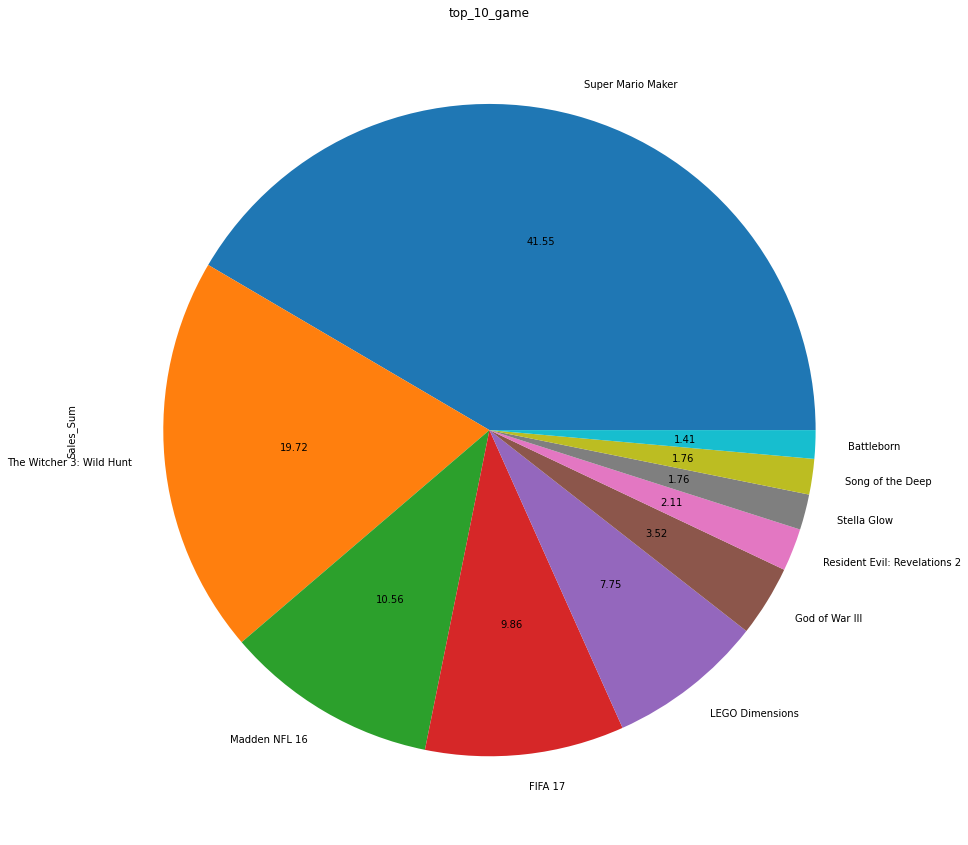

In [416]:
df5.groupby(['Name']).sum()['Sales_Sum'].sort_values(ascending = False)[:10].plot(kind='pie', figsize=(15, 15), autopct='%.2f')
plt.title('top_10_game')
plt.show()